### 非線形回帰モデル

線形回帰モデルでは表現できない複雑な構造をもつデータに対して、非線形回帰モデルを用いる
直線や平面、超平面では対応できないデータをモデル化することが目的

例えば下の図のようなデータに対して線形回帰モデルで下記直線をひくことは難しく、
$x^2$や$x^3$などの項が必要そうなことがわかる。

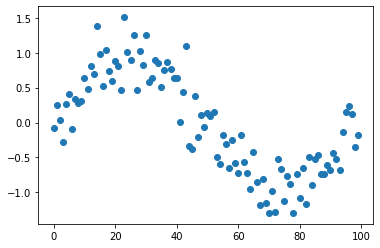

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
x = np.array(range(100))
dx = np.random.normal(loc=0.0, scale= 0.3, size=100)
y = np.sin(x*math.pi/len(x)*2)

fig, ax = plt.subplots()
ax.scatter(x,y+dx)

#### 基底展開法　
  線形回帰モデルの特徴量の代わりに特徴量を基底関数と呼ばれる、ある既知の非線形関数$\phi(x)$で変換した量を使い、その値とパラメータとの線形結合で予測する。\
  i番目のデータに対する回帰式は次のような式で書ける

$$
　y_{i} = w_0 + \sum_{j=1}^m w_{j} \phi_j(x_i) + \epsilon_i
$$

よく使われる基底関数$\phi$としては
- 多項式関数（$x^2, x^3 \dots$)
- ガウス型基底関数
- スプライン関数/Bスプライン関数\

がある。上記の回帰式の$m$は基底関数の数であり、多項式関数でいうと次数にあたる。自分で決める必要がある数であり、多くの基底関数を使えば複雑なデータを表現できるが、過学習に陥る可能性が高いので注意。

基底関数の具体例
- 多項式
$$
 \phi_j  = x^j
$$

- ガウス型基底関数
$$
 \phi_j(x) = \exp \left\{-\frac{(x-\mu_j)^2}{2h_j}  \right\} = \exp \left\{-\frac{(x-\mu_j)^2}{\sigma^2} \right\}
$$

平均値$u_j$を変えた基底関数を複数用意することで複雑な関数を表現できる。分母は$\sigma$であらわさせることもある通り、関数の広がりを表す。

パラメータの学習は線形回帰と同じように、平均二乗誤差を最小化するように求める。

### 非線形回帰の行列表記
線形回帰のときと同じように予測値を行列表記であらわすことができる。

説明変数は同じで、\
$$
\boldsymbol{x}_i = (x_{i1}, x_{i2}, \dots, x_{im}) \in \mathbb{R}^m
$$

非線形回帰では、説明変数を非線形関数で変換するので、
$$
 \phi(x_i) = (\phi_1(x_i), \phi_2(x_i), \dots, \phi_k(x_i))^T \in \mathbb{R}^k
$$

非線形関数の数$k$はあらかじめ決める必要がある。
トレーニングデータがnサンプルある場合
$$
\Phi = (\phi(\boldsymbol{x}_1), \phi(\boldsymbol{x}_2), \dots, \phi(\boldsymbol{x}_n))^T \in \mathbb{R}^{n \times k}
$$
の行列を用いて、予測値は

$$
 \hat{y} = \Phi(\Phi^T \Phi)^{-1} \Phi^T \boldsymbol{y}
$$

と表すことが可能。この予測値は最尤法によるもの。

### 未学習と過学習について

- 未学習(underfitting)\
 学習データに対して、十分に小さな誤差が得られていないモデル。
 （学習データに対して十分にfitしていないモデル）\
 
 
- 過学習(overfitting)\
  学習データにfitしすぎていて、汎用性がなくなっているモデル。\
  テストデータに対して誤差が大きくなってしまう状態。

### 過学習への対策

- 学習データを増やす
- 基底関数（変数）の数を減らして表現力（関数の複雑さ）を抑制する
- 正則化を利用して表現を抑制する

### 正則化について

目的関数に罰則項を加えることで、モデルが複雑になることを抑制する。
目的関数として、平均二乗誤差に罰則項を追加した

$$
 S_r = (\boldsymbol{y}-\Phi \boldsymbol{w})^T(\boldsymbol{y}-\Phi \boldsymbol{w}) + \gamma R(\boldsymbol{w})
$$

を最小化するようにパラメータを調整する。

- L1正則化
　L1ノルムを利用。つまり、$|\boldsymbol{w}|$を小さくするように目的関数を最小化する。
  L1ノルムを使用すると、いくつかの係数が完全に0になる。係数が0になる特徴量は無視される。
  
  
- L2正則化
　L2ノルムを利用。つまり、$|\boldsymbol{w}|^2$を小さくするように目的関数を最小化する。
  係数を小さくするようにwが調整される。正則化の強さを強くするとL1正則化に近づく。

### 汎化性能とパラメータの検証

学習データの学習誤差とテストデータのテスト誤差の差が小さいものが汎化性能が良いモデル。
モデルの検証、性能を測るには学習データとは別に検証データを用いて検証する（テストデータとは別）

#### データの分割方法
学習データと検証データとテストデータの分割

- ホールドアウト法\
　学習データと検証データ、テストデータを適当な割合で分割し、学習と検証を行う。
 それぞれをどのような割合で分割するかによって性能が変わる。
 データ数が大量にある場合を除いて、良い性能評価ができない。
 
 
- クロスバリデーション（交差検証）\
　手元のデータを学習用とテスト用に分ける。さらに学習データを分割する（例えば5分割）。
  5分割した場合、その1分割分を検証データにし、残りをモデル作成用の学習データにすることで、同じハイパーパラメータを用いて5モデル作成できる。その5つのモデルで検証データの精度を求め、平均値を出すことで、そのハイパーパラメータでのモデルの汎化性能を求める。


### ハンズオン（実装演習）

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
#予測したい関数の定義
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

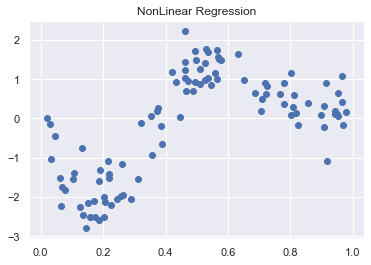

In [12]:
#真の関数からデータを生成し、それらにノイズを加え、学習データを作る
data = np.random.rand(100).astype(np.float32)
data = np.sort(data)
target = true_func(data)

#ノイズ
error = 0.5 * np.random.randn(100)
target = target + error

plt.scatter(data, target)
plt.title("NonLinear Regression")
plt.show()

### 線形回帰で予測 
ここではハイパーパラメータの調整はしないため、すべて学習データとして用いる

0.372242330785072


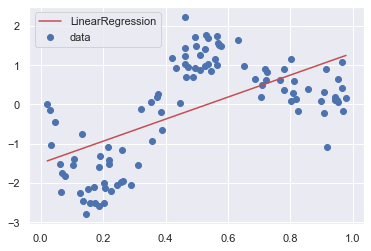

In [21]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1, 1)
target=target.reshape(-1,1)
clf.fit(data, target)

#作成したモデルから、学習データの予測値をプロット
p_line = clf.predict(data)
plt.scatter(data, target, label="data")
plt.plot(data, p_line, label="LinearRegression", color = "r",ls="-")

plt.legend(loc="best")

#R^2値の出力
print(clf.score(data, target))

回帰直線では40％弱しかデータを説明できていないことになる。
実際、グラフを見ればほとんど説明できていないと思われる。

### 非線形回帰で予測

### ガウス型基底関数を用いた非線形回帰（Ridge回帰）
ガウス型基底関数（動径基底関数）：Radial basis function kernel（rbfカーネル）

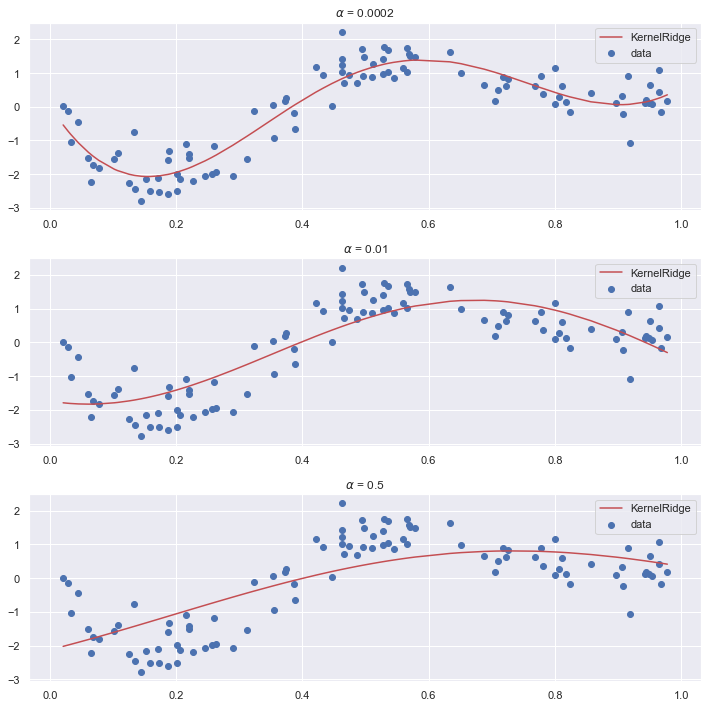

R2値
α=0.0002 : 0.87
α=0.01 : 0.72
α=0.5 : 0.60


In [55]:
from sklearn.kernel_ridge import KernelRidge

clf1 = KernelRidge(alpha=0.0002, kernel="rbf") #alphaは正則化の強さ。
clf2 = KernelRidge(alpha=0.01, kernel="rbf")
clf3 = KernelRidge(alpha=0.5, kernel="rbf")

clf1.fit(data, target)
clf2.fit(data, target)
clf3.fit(data, target)

p_kridge1 = clf1.predict(data)
p_kridge2 = clf2.predict(data)
p_kridge3 = clf3.predict(data)

fig, ax = plt.subplots(3,1, figsize=(10,10))

ax[0].scatter(data, target, label="data")
ax[0].plot(data, p_kridge1, color = "r", label="KernelRidge")
ax[0].set_title(r"$\alpha$ = 0.0002")
ax[0].legend(loc="best")

ax[1].scatter(data, target, label="data")
ax[1].plot(data, p_kridge2, color = "r", label="KernelRidge")
ax[1].set_title(r"$\alpha$ = 0.01")
ax[1].legend(loc="best")

ax[2].scatter(data, target, label="data")
ax[2].plot(data, p_kridge3, color = "r", label="KernelRidge")
ax[2].set_title(r"$\alpha$ = 0.5")
ax[2].legend(loc="best")

plt.tight_layout()
plt.show()

print("R2値")
print("{}=0.0002 : {:.2f}".format(chr(945), clf1.score(data, target)))
print("{}=0.01 : {:.2f}".format(chr(945), clf2.score(data, target)))
print("{}=0.5 : {:.2f}".format(chr(945), clf3.score(data, target)))

リッジ回帰の正則化の強さをパラメータ$\alpha$で調整。値が大きいほど、関数の複雑さが抑制されていることがわかる。
正則化を強めることで、R2値が小さくなっていることがわかる。

### カーネルRidge回帰
変数をrbfカーネルで先に変換したうで、Ridge回帰で予測

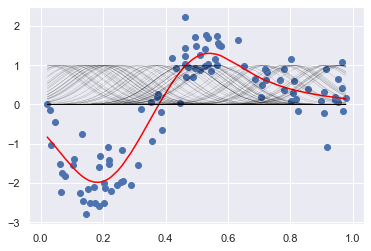

R2値:0.87


In [76]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)

clf = Ridge(alpha=30)
clf.fit(kx, target) #学習するのはカーネル化したデータ

p_ridge = clf.predict(kx)
#学習データのプロット
plt.scatter(data, target, label="data")
#リッジ回帰による予測値のプロット
plt.plot(data, p_ridge, label="RidgeRegression", color="red")
#ガウスカーネルのプロット
for i in range(len(kx)):
    plt.plot(data, kx[i], color="black", linestyle="-", linewidth=0.1)

plt.show()

print("R2値:{:.2f}".format(clf.score(kx, target)))

### 多項式回帰(PolynominalFeatures使用）
PolynominalFeaturesを使用することで、[x, y]は[1, x, y, x^2, xy, y^2]に変換される。
この次数は引数dで決定でき、defaultは２


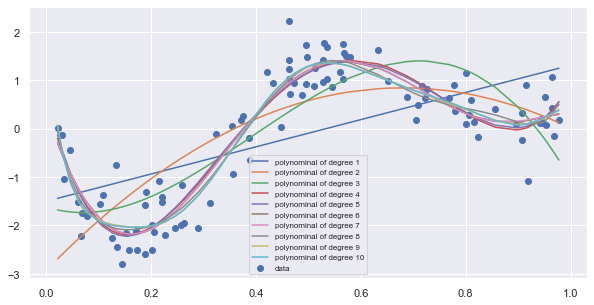

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

plt.figure(figsize=(10,5))

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("linear", LinearRegression())
    ])
    
    regr.fit(data, target)
    p_poly = regr.predict(data)
    
    plt.plot(data, p_poly, label="polynominal of degree %d" %(d))

plt.scatter(data, target, label = "data")
plt.legend(loc="best", fontsize=8)
plt.show()


### Lasso回帰（rbfカーネル使用）

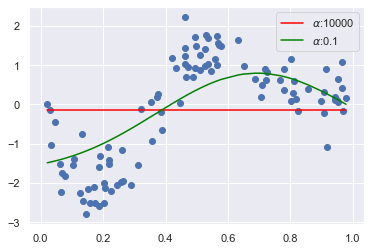

α:10000のR2値 : -2.220446049250313e-16
α:0.1のR2値 : 0.6177742733156213


In [106]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)

lasso_clf1 = Lasso(alpha=10000, max_iter=1000)
lasso_clf1.fit(kx, target)

lasso_clf2 = Lasso(alpha=0.1, max_iter=1000)
lasso_clf2.fit(kx, target)


p_lasso1 = lasso_clf1.predict(kx)
p_lasso2 = lasso_clf2.predict(kx)

plt.scatter(data, target)
plt.plot(data, p_lasso1, color='red', linestyle='-', label=r"$\alpha$:10000")
plt.plot(data, p_lasso2, color='green', linestyle='-',label=r"$\alpha$:0.1")

plt.legend()
plt.show()

print("α:10000のR2値 : {}".format(lasso_clf1.score(kx, target)))
print("α:0.1のR2値 : {}".format(lasso_clf2.score(kx, target)))

正則化パラメータが大きいとき、ほとんどのパラメータが0となるため、直線になっている
実際にすべてのパラメータ（係数）が０になっている。下記参照

In [113]:
lasso_clf1.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

#### 補足

### カーネル回帰について

$$
 \hat{y}(\boldsymbol{x_i}) = \sum_j^N \alpha_j k(\boldsymbol{x_j}, \boldsymbol{x_i})
$$

$$
 k(\boldsymbol{x_j},\boldsymbol{x_i}) = \exp(-\gamma || x_j - x_i  ||)
$$

で回帰を行う方法。カーネルはいろいろ種類があるが、ここではガウスカーネルを使用
データが$N$個ある場合、$i$番目のデータを予測するのに、すべてのデータとのガウスカーネルを計算しその線形結合で予測する。\
$i = j$のとき、$k=1$になる。
カーネルからN行N列の行列ができる。$K_{ij} = k(x_i, x_j)$となり
(i, j)成分はi番目のデータとj番目のデータのカーネル距離